In [1]:
import pandas as pd
import json
import requests
from api_keys import crime_api_key
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
ori_id = "TX0840400"
data = pd.read_csv("nibrs_incident_2009.csv")
data.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,agency_id,incident_id,nibrs_month_id,incident_number,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,ddocname,orig_format,ff_line_number,did
0,18798,51604181,4831419,09010663,NaN,NaN,2009-01-01 00:00:00,NaN,9.0,6,NaN,0,C,2009_01_TX0140700_09010663_INC_NIBRS,NaN,NaN,NaN
1,18798,51608097,4831419,10000359,NaN,NaN,2009-01-12 00:00:00,NaN,19.0,6,NaN,0,C,2009_01_TX0140700_10000359_INC_NIBRS,NaN,NaN,NaN
2,18798,51591567,4831419,09005012,NaN,NaN,2009-01-12 00:00:00,NaN,8.0,6,NaN,0,C,2009_01_TX0140700_09005012_INC_NIBRS,NaN,NaN,NaN
3,18798,51580910,4831419,09000111,NaN,NaN,2009-01-04 00:00:00,NaN,1.0,6,NaN,0,C,2009_01_TX0140700_09000111_INC_NIBRS,NaN,NaN,NaN
4,18798,51580911,4831419,09000113,NaN,NaN,2009-01-04 00:00:00,NaN,1.0,6,NaN,0,C,2009_01_TX0140700_09000113_INC_NIBRS,NaN,NaN,NaN


In [3]:
data_formated = data[["incident_date", "ddocname"]]
data_formated.head()

,incident_date,ddocname
0,2009-01-01 00:00:00,2009_01_TX0140700_09010663_INC_NIBRS
1,2009-01-12 00:00:00,2009_01_TX0140700_10000359_INC_NIBRS
2,2009-01-12 00:00:00,2009_01_TX0140700_09005012_INC_NIBRS
3,2009-01-04 00:00:00,2009_01_TX0140700_09000111_INC_NIBRS
4,2009-01-04 00:00:00,2009_01_TX0140700_09000113_INC_NIBRS


In [4]:
data_formated["incident_date"] = data_formated["incident_date"].str[:7]
data_formated.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,incident_date,ddocname
0,2009-01,2009_01_TX0140700_09010663_INC_NIBRS
1,2009-01,2009_01_TX0140700_10000359_INC_NIBRS
2,2009-01,2009_01_TX0140700_09005012_INC_NIBRS
3,2009-01,2009_01_TX0140700_09000111_INC_NIBRS
4,2009-01,2009_01_TX0140700_09000113_INC_NIBRS


In [5]:
data_formated["ddocname"] = data_formated["ddocname"].str[8:17]
data_formated.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,incident_date,ddocname
0,2009-01,TX0140700
1,2009-01,TX0140700
2,2009-01,TX0140700
3,2009-01,TX0140700
4,2009-01,TX0140700


In [6]:
data_formated.rename(columns={"ddocname":"agency_name"}, inplace=True)
data_formated.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,incident_date,agency_name
0,2009-01,TX0140700
1,2009-01,TX0140700
2,2009-01,TX0140700
3,2009-01,TX0140700
4,2009-01,TX0140700


In [7]:
final_galveston_data = data_formated.loc[data_formated["agency_name"] == ori_id]
final_galveston_data.head()

,incident_date,agency_name
78306,2009-01,TX0840400
78307,2009-01,TX0840400
78308,2009-01,TX0840400
78309,2009-01,TX0840400
78310,2009-01,TX0840400


In [8]:
final_galveston_data.count()

incident_date    6696
agency_name      6696
dtype: int64

In [9]:
info_plot = final_galveston_data.groupby("incident_date").count()
info_plot.head()

,agency_name
incident_date,
2009-01,481
2009-02,484
2009-03,444
2009-04,512
2009-05,637


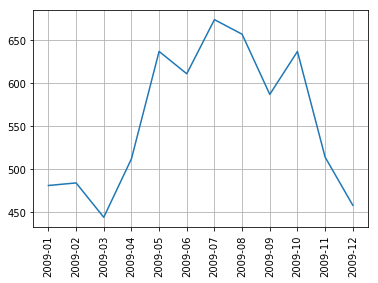

In [13]:
plt.plot(info_plot.index, info_plot.agency_name)
plt.xticks(rotation=90)
plt.grid()